In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def showImage(img):
    plt.imshow(img, cmap="gray")

In [17]:
img = cv2.imread('../img/lenna.png', 0)

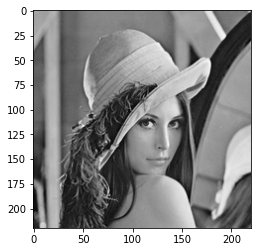

In [60]:
showImage(img)

In [61]:
#   Fourier transform
f = np.fft.fft2(img)

In [62]:
f.shape

(220, 220)

In [63]:
type(f)

numpy.ndarray

In [64]:
type(f[0,0])

numpy.complex128

In [65]:
f[0,0]

(6406853+0j)

In [66]:
#  Move the DC component of the FFT output to the center of the spectrum
fshift = np.fft.fftshift(f)

In [67]:
fshift[0,0]

(-401.0000000000016-1.4708234630234074e-12j)

In [68]:
# logarithmic transformation: 
#s = c log(1 + r); sendo 'c' uma constante e 'r' o valor do pixel antes do processamento
magnitude_spectrum = 20*np.log(np.abs(fshift))

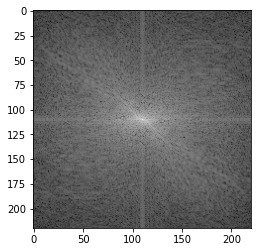

In [69]:
showImage(magnitude_spectrum)

In [44]:
"""The removal of the low frequency component is actually a high pass 
(high frequency pass) filtering operation that identifies the boundaries of the image."""

#Create mask
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
 # Use mask to remove low frequency components
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

In [48]:
# logarithmic transformation
magnitude_spectrum1 = 20*np.log(np.abs(fshift))

<ipython-input-48-df7881e4b54f>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(np.abs(fshift))


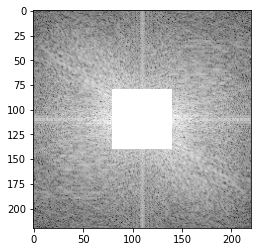

In [49]:
showImage(magnitude_spectrum1)

In [46]:
# 
f_ishift = np.fft.ifftshift(fshift)

In [50]:
# inverse Fourier transform
img_back = np.fft.ifft2(f_ishift)

In [55]:
type(img_back[0,0]) #numpy.complex128

numpy.complex128

In [56]:
img_back[0,0]

(30.105819382243773-0.6197545450770944j)

In [57]:
# 
img_back = np.abs(img_back)

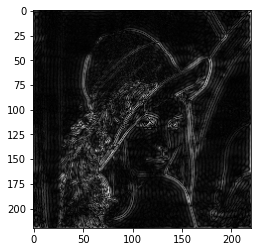

In [58]:
showImage(img_back)

(Text(0.5, 1.0, 'Result in JET'), (-0.5, 219.5, 219.5, -0.5))

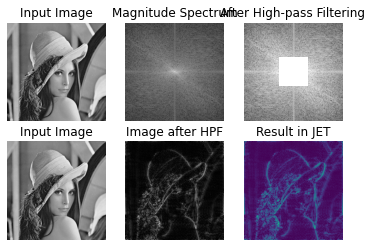

In [59]:
plt.subplot(231), plt.imshow(img, cmap='gray'),
plt.title('Input Image'), plt.axis('off')

plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'),
plt.title('Magnitude Spectrum'), plt.axis('off')

plt.subplot(233), plt.imshow(magnitude_spectrum1, cmap='gray'),
plt.title('After High-pass Filtering'), plt.axis('off')

plt.subplot(234), plt.imshow(img, cmap='gray'),
plt.title('Input Image'), plt.axis('off')

plt.subplot(235), plt.imshow(img_back, cmap='gray'), #this has cmpa=gray
plt.title('Image after HPF'), plt.axis('off')

plt.subplot(236), plt.imshow(img_back), #this has color
plt.title('Result in JET'), plt.axis('off')